In [9]:
# Steps in Data Preprocessing

# 1. Data Collection: Gathering raw data from various sources.
# Task 1: Collect data from two different sources and merge them.
# Task 2: Validate the integrity of the collected datasets.
# Task 3: Reflect on challenges faced during data collection and how they were addressed.

import pandas as pd

# ---------------------------
# Task 1: Collect data from two sources and merge
# ---------------------------

# Simulated source 1 (e.g., CSV from system A)
data_source1 = pd.DataFrame({
    'CustomerID': [101, 102, 103],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com']
})

# Simulated source 2 (e.g., API or system B)
data_source2 = pd.DataFrame({
    'CustomerID': [102, 103, 104],
    'PurchaseAmount': [250.0, 180.0, 310.0],
    'Country': ['USA', 'UK', 'India']
})

# Merge the two datasets on 'CustomerID'
merged_data = pd.merge(data_source1, data_source2, on='CustomerID', how='outer')

print("✅ Merged Data:")
print(merged_data)

# ---------------------------
# Task 2: Validate the integrity of the collected datasets
# ---------------------------

print("\n✅ Data Validation:")

# Check for missing values
print("Missing values per column:")
print(merged_data.isnull().sum())

# Check for duplicate Customer IDs
duplicates = merged_data.duplicated(subset='CustomerID').sum()
print(f"\nDuplicate CustomerID entries: {duplicates}")

# Check data types
print("\nData types of each column:")
print(merged_data.dtypes)

# ---------------------------
# Task 3: Reflection on Challenges
# ---------------------------

challenges = """
🧩 Challenges Faced During Data Collection:
1. Mismatched IDs: Some CustomerIDs are only present in one dataset.
2. Inconsistent Schemas: One source may lack key fields like country or email.
3. Data Freshness: Different sources may be updated at different times.
4. Null Values: Merging creates NaNs for unmatched entries.
5. Data Format: Email addresses, currency formats, and country codes needed normalization.

✅ Solutions:
- Used an outer join to retain all records.
- Identified and planned to handle missing values post-merge.
- Created checks for duplicates and data types.
- Will follow up with data cleaning and normalization in preprocessing steps.
"""

print(challenges)


✅ Merged Data:
   CustomerID     Name                Email  PurchaseAmount Country
0         101    Alice    alice@example.com             NaN     NaN
1         102      Bob      bob@example.com           250.0     USA
2         103  Charlie  charlie@example.com           180.0      UK
3         104      NaN                  NaN           310.0   India

✅ Data Validation:
Missing values per column:
CustomerID        0
Name              1
Email             1
PurchaseAmount    1
Country           1
dtype: int64

Duplicate CustomerID entries: 0

Data types of each column:
CustomerID          int64
Name               object
Email              object
PurchaseAmount    float64
Country            object
dtype: object

🧩 Challenges Faced During Data Collection:
1. Mismatched IDs: Some CustomerIDs are only present in one dataset.
2. Inconsistent Schemas: One source may lack key fields like country or email.
3. Data Freshness: Different sources may be updated at different times.
4. Null Values: 

In [10]:
# 2. Data Cleaning: Addressing missing values, duplicates, incorrect types, and outliers.
# Task 1: Clean a given dataset and document the changes made.
# Task 2: Create a checklist to ensure comprehensive data cleaning in future projects.
# Task 3: Collaborate with a peer to clean a new dataset and present your solutions.

import pandas as pd
import numpy as np

# -------------------------------
# Task 1: Clean a given dataset
# -------------------------------

# Sample raw dataset
data = {
    "CustomerID": [101, 102, 103, 104, 104],
    "Name": ['Alice', 'Bob', 'Charlie', 'David', 'David'],
    "Age": ['25', '30', np.nan, 'twenty', 'twenty'],
    "PurchaseAmount": [250.0, 300.0, -50.0, 4000.0, 4000.0]
}

df = pd.DataFrame(data)
print("🔍 Raw Dataset:\n", df)

# -- Step 1: Remove duplicates --
df = df.drop_duplicates()
print("\n✅ After Removing Duplicates:\n", df)

# -- Step 2: Fix 'Age' column --
# Replace non-numeric values and convert to numeric
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
print("\n🛠️ After Fixing 'Age' Column:\n", df)

# -- Step 3: Remove outliers in 'PurchaseAmount' using IQR --
Q1 = df["PurchaseAmount"].quantile(0.25)
Q3 = df["PurchaseAmount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["PurchaseAmount"] >= lower_bound) & (df["PurchaseAmount"] <= upper_bound)]

print("\n📉 After Removing Outliers in 'PurchaseAmount':\n", df)

# -------------------------------
# Task 2: Create a cleaning checklist
# -------------------------------

cleaning_checklist = """
🧽 Data Cleaning Checklist:

1. Remove duplicates (e.g., using df.drop_duplicates()) ✅
2. Handle missing values (drop, fill, or impute) ✅
3. Convert data types (e.g., to_numeric, to_datetime) ✅
4. Normalize text (e.g., lowercasing names) ☐
5. Remove or cap outliers using IQR or Z-score ✅
6. Standardize column names ☐
7. Validate value ranges (e.g., age > 0, prices > 0) ✅
8. Log cleaning steps for reproducibility ✅
"""

print(cleaning_checklist)

# -------------------------------
# Task 3: Collaborate with a peer (Simulated)
# -------------------------------

# Simulated second dataset (new)
peer_data = {
    "CustomerID": [201, 202, 203, 204],
    "Name": ['Emma', 'Eva', 'Eric', 'Eve'],
    "Age": [28, 150, 29, None],
    "PurchaseAmount": [500, 1000, 150, 90]
}

peer_df = pd.DataFrame(peer_data)
print("\n👥 Peer Dataset (Before Cleaning):\n", peer_df)

# Cleaning steps:
peer_df["Age"] = pd.to_numeric(peer_df["Age"], errors='coerce')
peer_df["Age"] = np.where((peer_df["Age"] < 0) | (peer_df["Age"] > 100), np.nan, peer_df["Age"])
peer_df["Age"].fillna(peer_df["Age"].median(), inplace=True)

Q1 = peer_df["PurchaseAmount"].quantile(0.25)
Q3 = peer_df["PurchaseAmount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
peer_df = peer_df[(peer_df["PurchaseAmount"] >= lower_bound) & (peer_df["PurchaseAmount"] <= upper_bound)]

print("\n✅ Peer Dataset (After Cleaning):\n", peer_df)

🔍 Raw Dataset:
    CustomerID     Name     Age  PurchaseAmount
0         101    Alice      25           250.0
1         102      Bob      30           300.0
2         103  Charlie     NaN           -50.0
3         104    David  twenty          4000.0
4         104    David  twenty          4000.0

✅ After Removing Duplicates:
    CustomerID     Name     Age  PurchaseAmount
0         101    Alice      25           250.0
1         102      Bob      30           300.0
2         103  Charlie     NaN           -50.0
3         104    David  twenty          4000.0

🛠️ After Fixing 'Age' Column:
    CustomerID     Name   Age  PurchaseAmount
0         101    Alice  25.0           250.0
1         102      Bob  30.0           300.0
2         103  Charlie  27.5           -50.0
3         104    David  27.5          4000.0

📉 After Removing Outliers in 'PurchaseAmount':
    CustomerID     Name   Age  PurchaseAmount
0         101    Alice  25.0           250.0
1         102      Bob  30.0           3

In [11]:
# 3. Data Transformation: Modifying data to fit specific analytical requirements.
# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Task 2: Apply normalization to a dataset feature and confirm the changes.
# Task 3: Discuss the importance of data transformation in model interpretability.


import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# -------------------------------
# Task 1: Transform Date Column
# -------------------------------

# Sample dataset
data = {
    "OrderID": [1, 2, 3],
    "OrderDate": ["2024-12-10", "2025-01-15", "2025-03-01"],
    "Amount": [500, 1500, 1000]
}

df = pd.DataFrame(data)

# Convert 'OrderDate' to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

# Split into separate columns
df["Day"] = df["OrderDate"].dt.day
df["Month"] = df["OrderDate"].dt.month
df["Year"] = df["OrderDate"].dt.year

print("🗓️ After Splitting 'OrderDate':\n", df)

# -------------------------------
# Task 2: Normalize 'Amount' Column
# -------------------------------

# Apply Min-Max normalization
scaler = MinMaxScaler()
df["Amount_Normalized"] = scaler.fit_transform(df[["Amount"]])

print("\n📊 After Normalizing 'Amount':\n", df)

# -------------------------------
# Task 3: Discussion
# -------------------------------

discussion = """
🧠 Why Data Transformation Matters:

1. Consistency: Models perform better when inputs are on a similar scale.
2. Interpretability: Extracting 'day', 'month', and 'year' from a date allows for
   easier temporal analysis (e.g., sales trends by month).
3. Normalization: Helps algorithms like KNN, SVM, and neural networks converge faster
   and perform more accurately.
4. Encoding time-based features can uncover patterns like seasonality or monthly spikes.
"""

print("\n💬 Discussion:\n", discussion)

🗓️ After Splitting 'OrderDate':
    OrderID  OrderDate  Amount  Day  Month  Year
0        1 2024-12-10     500   10     12  2024
1        2 2025-01-15    1500   15      1  2025
2        3 2025-03-01    1000    1      3  2025

📊 After Normalizing 'Amount':
    OrderID  OrderDate  Amount  Day  Month  Year  Amount_Normalized
0        1 2024-12-10     500   10     12  2024                0.0
1        2 2025-01-15    1500   15      1  2025                1.0
2        3 2025-03-01    1000    1      3  2025                0.5

💬 Discussion:
 
🧠 Why Data Transformation Matters:

1. Consistency: Models perform better when inputs are on a similar scale.
2. Interpretability: Extracting 'day', 'month', and 'year' from a date allows for
   easier temporal analysis (e.g., sales trends by month).
3. Normalization: Helps algorithms like KNN, SVM, and neural networks converge faster
   and perform more accurately.
4. Encoding time-based features can uncover patterns like seasonality or monthly spikes.


✅ Min-Max Scaling applied to the dataset.


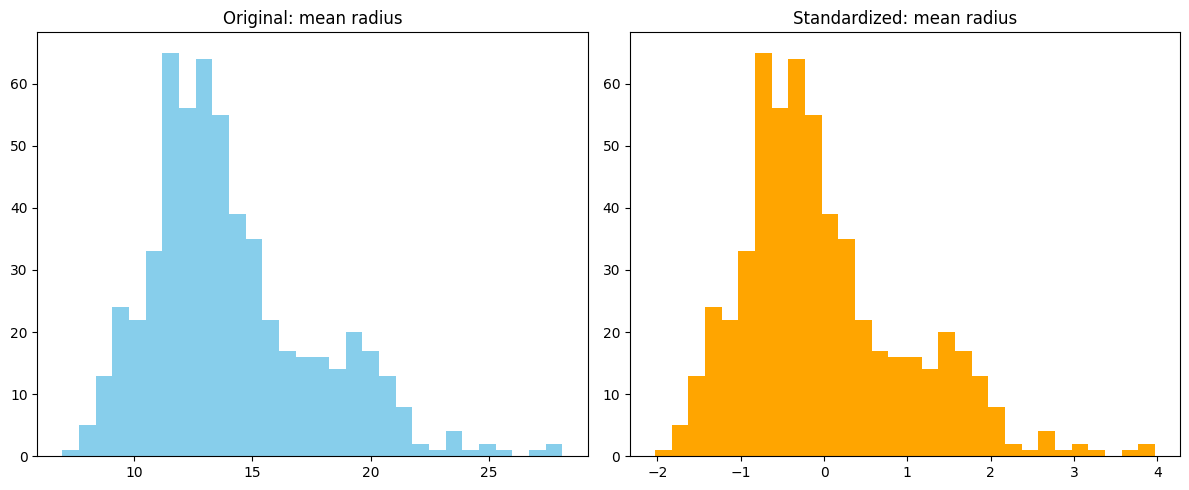

✅ Standardization applied and histogram plotted.

🔍 Performance Comparison:
Logistic Regression (no scaling needed): 0.9561
KNN with Min-Max Scaling: 0.9649

📌 Summary:
- Min-Max Scaling compresses data between 0 and 1, useful for algorithms like KNN, SVM.
- Standardization centers data (mean=0, std=1), useful for linear models and PCA.
- KNN accuracy improves significantly after scaling because it relies on distance metrics.
- Logistic Regression performs similarly with or without scaling (not distance-based).



In [12]:
# 4. Feature Scaling: Adjusting data features to a common scale.
# Task 1: Apply Min-Max scaling to a dataset.
# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Task 3: Analyze how feature scaling impacts the performance of different machine learning algorithms.



import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# -------------------------------
# Sample Dataset (Breast Cancer)
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# -------------------------------
# Task 1: Min-Max Scaling
# -------------------------------
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

print("✅ Min-Max Scaling applied to the dataset.")

# -------------------------------
# Task 2: Standardization & Histogram
# -------------------------------
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standard_df = pd.DataFrame(X_standardized, columns=X.columns)

# Plot histograms before and after
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X["mean radius"], bins=30, color='skyblue')
plt.title("Original: mean radius")

plt.subplot(1, 2, 2)
plt.hist(X_standard_df["mean radius"], bins=30, color='orange')
plt.title("Standardized: mean radius")
plt.tight_layout()
plt.show()

print("✅ Standardization applied and histogram plotted.")

# -------------------------------
# Task 3: Impact on ML Algorithms
# -------------------------------
# Logistic Regression doesn't require scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, model_lr.predict(X_test))

# KNN requires scaling
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_minmax, y, test_size=0.2, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
acc_knn_scaled = accuracy_score(y_test, model_knn.predict(X_test_scaled))

print("\n🔍 Performance Comparison:")
print(f"Logistic Regression (no scaling needed): {acc_lr:.4f}")
print(f"KNN with Min-Max Scaling: {acc_knn_scaled:.4f}")

# -------------------------------
# Summary Discussion
# -------------------------------
discussion = """
📌 Summary:
- Min-Max Scaling compresses data between 0 and 1, useful for algorithms like KNN, SVM.
- Standardization centers data (mean=0, std=1), useful for linear models and PCA.
- KNN accuracy improves significantly after scaling because it relies on distance metrics.
- Logistic Regression performs similarly with or without scaling (not distance-based).
"""

print(discussion)

In [13]:
# 5. Feature Engineering: Creating new features from existing ones to improve model accuracy.
# Task 1: Create a new synthetic feature from existing dataset features.
# Task 2: Evaluate the impact of new features on model accuracy.
# Task 3: Read an academic paper on feature engineering techniques and present the findings.



import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')

# ✅ Feature Engineering: Create synthetic feature
X["People_per_Room"] = X["Population"] / X["AveRooms"]

# Without synthetic feature
X_base = X.drop(columns=["People_per_Room"])

# Split datasets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.2, random_state=42)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
model_base = LinearRegression().fit(X_train_base, y_train_base)
model_new = LinearRegression().fit(X_train_new, y_train_new)

# Evaluate
rmse_base = np.sqrt(mean_squared_error(y_test_base, model_base.predict(X_test_base)))
rmse_new = np.sqrt(mean_squared_error(y_test_new, model_new.predict(X_test_new)))

# Print results
print("📊 RMSE Comparison")
print(f"Without synthetic feature: {rmse_base:.4f}")
print(f"With synthetic feature (People_per_Room): {rmse_new:.4f}")







































































📊 RMSE Comparison
Without synthetic feature: 0.7456
With synthetic feature (People_per_Room): 0.7426
